In [67]:
#data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

#filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#acquire data
train_df = pd.read_csv("/Users/bravery_simon/Downloads/train.csv")
test_df = pd.read_csv("/Users/bravery_simon/Downloads/test.csv")
combine = [train_df,test_df]

In [3]:
#Analyzing by describing data
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Categorical**: Survived,Sex,Embarked,Pclass(ordinal)

**Continuous**:Age,Fare,Discrete,SibSp,Parch

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()
print("_"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## how to interpret the above data
#### 1. Total sample are 891 or 40% of the actual number of passengers on board (2224 passengers)
#### 2. Survived is a categorical feature with 0 or 1 values
#### 3. Around 38% samples survived representative of the actual survial rate at 32%.
#### 5. Few elderly passengers（less than 1 %) within range 65-80
#### 4. Most passengers(>75%) did not travel with parents or children
#### 6. Nearly 30% of the passengers had siblings and/or spouse aboard
#### 7. Fare varied differently with few passengers (less than 1%) paying as high as $512.

In [7]:
train_df.describe(include=['object'])
#Observations:
#Names are unique across the dataset; ticket has high(about 23%)duplicate values;

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Strom, Miss. Telma Matilda",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',
                                                                                     ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',
                                                                               ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',
                                                                                ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',
                                                                                   ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


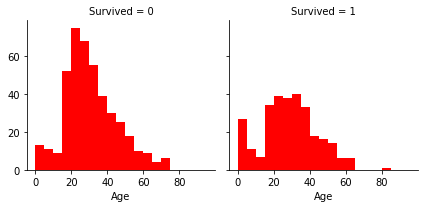

In [12]:
g=sns.FacetGrid(train_df,col='Survived')
bins = np.arange(0,100,5)
g.map(plt.hist,'Age',bins=bins,color='r')

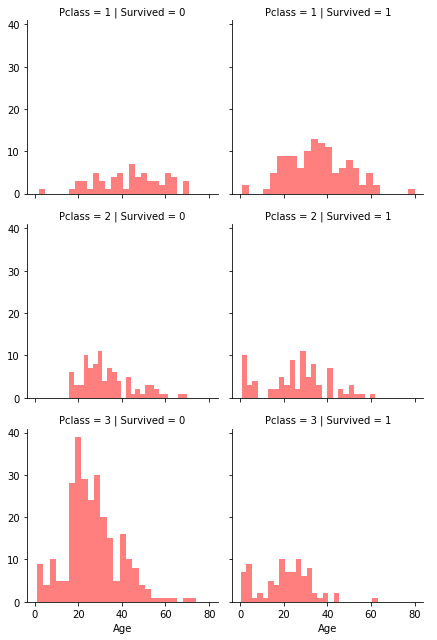

In [13]:
g=sns.FacetGrid(train_df,col='Survived',row='Pclass',height=3,aspect=1)
g.map(plt.hist,'Age',bins=25,alpha=0.5,color='r').add_legend()

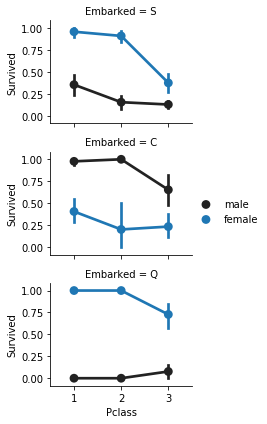

In [14]:
g=sns.FacetGrid(train_df,row='Embarked',height=2,aspect=1.5)
g.map(sns.pointplot,'Pclass','Survived','Sex').add_legend()

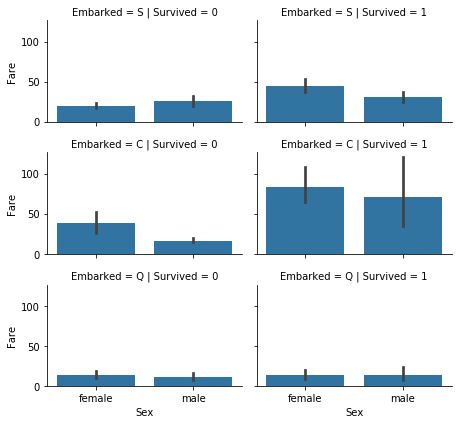

In [15]:
g=sns.FacetGrid(train_df,row='Embarked',col='Survived',height=2,aspect=1.6)
g.map(sns.barplot,'Sex','Fare').add_legend()

## From the above pivoting and visulization analysis we can conclude:
#### 1. We should consider Age, Sex,Embarked,Pclass,Fare for model training.
#### 2. We need to complete those features, replacing the NA values in thoes features.

In [16]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
#delete irrelevant features
print("Before",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)
train_df = train_df.drop(['Ticket','Cabin'],axis=1)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)
combine=[train_df,test_df]
print("After",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [18]:
#Creating new features:Title
for dataset in combine:
    dataset['Title']= dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train_df['Title'],train_df['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Jonkheer','Dona','Sir',\
                                              'Major','Dr','Rev'],'Rare')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [20]:
#Convert categorical titles to ordinal
title_mapping = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)   
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [21]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3


In [22]:
#After we extract the title and now we can actually drop the Name feature
train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(['Name'],axis=1)
combine=[train_df,test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [23]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [24]:
#Converting a categorical feature
for dataset in combine:
    mapping = {'male':0,'female':1}
    dataset['Sex']=dataset['Sex'].map(mapping)
train_df.head()  ##Notice: This cell must run together.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


## We can consider three methods to complete a numberical continous feature
#### 1. A simple way to generate random numbers between mean and standardard deviation.
#### 2.To use other correlated features. 
##### (In this case, we note correlation among age, gender and Plass, so we guess age vaules using median vaules across sets of Pclass and gender feature combinations.)
#### 3. Combination of methods 1 and 2.

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x13175e400>>

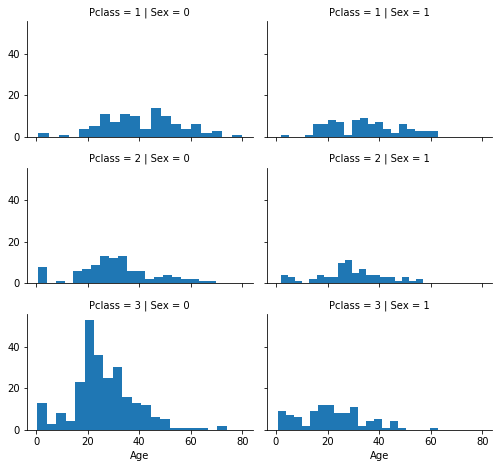

In [25]:
g = sns.FacetGrid(train_df, row ='Pclass', col='Sex',size =2.2,aspect=1.6)
g.map(plt.hist,'Age', bins=20).add_legend

In [26]:
#prepare an empty array to contain guessed Age values based on Pclass and gender combinations
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [27]:
# Now we iterate over sex(0 or 1) and Pclass(1,2,3) to calculate guessed values for Age for the six combinations
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex']==i)&(dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j]=int(age_guess/0.5+0.5)*0.5
            #ages_guess = rnd.uniform(age_mean-age_std,age_mean+age_std)
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull())&(dataset.Sex==i)&
                        (dataset.Pclass==j+1),'Age']=guess_ages[i,j]
    dataset['Age']=dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [28]:
#Create Agebands and determine correlations with survivial
train_df['AgeBand']=pd.cut(train_df['Age'],5)
train_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean()\
.sort_values(by='Survived',ascending=True)

,AgeBand,Survived
4,"(64.0, 80.0]",0.090909
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
0,"(-0.08, 16.0]",0.550000


In [29]:
for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=32),'Age'] = 1
    dataset.loc[(dataset['Age']>32)&(dataset['Age']<=48),'Age']=2
    dataset.loc[(dataset['Age']>48)&(dataset['Age']<=64),'Age']=3
    dataset.loc[dataset['Age']>64,'Age']=4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [30]:
train_df=train_df.drop(['AgeBand'],axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [31]:
#Create new featuree combining existing features
for dataset in combine:
    dataset['FamilySize'] =dataset['SibSp']+dataset['Parch']+1
train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).\
    mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [32]:
for dataset in combine:
    dataset['IsAlone']=0  #Equal to 0 means not alone
    dataset.loc[dataset['FamilySize']==1,'IsAlone'] = 1
train_df[['IsAlone','Survived']].groupby('IsAlone',as_index=False).mean()  

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [33]:
#Now we can drop the Parch, SibSp,and FamiliySize features 
train_df = train_df.drop(['Parch','SibSp','FamilySize'],axis=1)
test_df = test_df.drop(['Parch','SibSp','FamilySize'],axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [34]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [35]:
# We can also create an artificial feature combinig Pclass and Age
for dataset in combine:
    dataset['Age*Class'] = dataset.Age*dataset.Pclass
train_df.loc[:,['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [36]:
for dataset in combine:
    freq_port = dataset['Embarked'].dropna().mode()
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()\
.sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [38]:
#Converting categorical feature to numberic
for dataset in combine:
    freq_port = dataset['Embarked'].dropna().mode()
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2})
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0.0,1,0,3
1,1,1,1,2,71.2833,1.0,3,0,2
2,1,3,1,1,7.9250,0.0,2,1,3
3,1,1,1,2,53.1000,0.0,3,0,2
4,0,3,0,2,8.0500,0.0,1,1,6


In [41]:
#quick completing and converting a numberic feature
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)

In [42]:
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='Survived'\
                                                                                          ,ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [44]:
for dataset in combine:
    dataset.loc[dataset['Fare']<= 7.91,'Fare'] = 0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare'] <= 14.454),'Fare'] = 1
    dataset.loc[(dataset['Fare']>14.454) &(dataset['Fare']<=31),'Fare']=2
    dataset.loc[dataset['Fare']>31,'Fare'] = 3
    dataset['Fare'] =dataset['Fare'].astype(int)

In [45]:
train_df = train_df.drop(['FareBand'],axis=1)
combine = [train_df,test_df]
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0.0,1,0,3
1,1,1,1,2,3,1.0,3,0,2
2,1,3,1,1,1,0.0,2,1,3
3,1,1,1,2,3,0.0,3,0,2
4,0,3,0,2,1,0.0,1,1,6
5,0,3,0,1,1,2.0,1,1,3
6,0,1,0,3,3,0.0,1,1,3
7,0,3,0,0,2,0.0,4,0,0
8,1,3,1,1,1,0.0,3,0,3
9,1,2,1,0,2,1.0,3,0,0


In [ ]:
#After all the cleaning and feature engineering, I checked the data and found that Embarked is float
#So now we fix it individually.

In [56]:
train_df['Embarked'].fillna(0,inplace=True)

In [57]:
train_df['Embarked'].astype(int)

0      0
1      1
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      1
10     0
11     0
12     0
13     0
14     0
15     0
16     2
17     0
18     0
19     1
20     0
21     0
22     2
23     0
24     0
25     0
26     1
27     0
28     2
29     0
      ..
861    0
862    0
863    0
864    0
865    0
866    1
867    0
868    0
869    0
870    0
871    0
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    0
881    0
882    0
883    0
884    0
885    2
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

In [62]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0.0,1,0,3
1,1,1,1,2,3,1.0,3,0,2
2,1,3,1,1,1,0.0,2,1,3
3,1,1,1,2,3,0.0,3,0,2
4,0,3,0,2,1,0.0,1,1,6


In [63]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


## Model,predict and solve

### 1. This is a classification and regression problem.
### 2. To identity relationship between output (survived or not) wiht other variables or features.
### 3. Supervised learning as we are training the model with a given dataset.

#### Regression+Classification+Supervised learning. So we can narrow down the choices of model to:
    **Logsitic regression**

    **KNN/K-Nearest Neighbors**

    **Support vector machine**

    **Naive Bayes clssifier**

    **Decision Tree**

    **Random Forest**

    **Perceptron**

    **Artificial Neural Network**

    **RVM/Relevance Vector Machine**

In [65]:
X_train=train_df.drop('Survived',axis=1)
Y_train=train_df['Survived']
X_test=test_df.drop('PassengerId',axis=1).copy()
X_train.shape,Y_train.shape,X_test.shape

((891, 8), (891,), (418, 8))

In [71]:
#Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train)*100,2)
acc_log

81.26

In [74]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
1,Sex,2.200978
5,Title,0.414362
4,Embarked,0.281026
6,IsAlone,0.262084
3,Fare,-0.022062
7,Age*Class,-0.085959
2,Age,-0.371647
0,Pclass,-1.083515


### We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by caculating the coefficient of the features in the decision function.

#### Positive coefficients increase the log-odds of the response( and thus increase the probability), and negative coefficients decrease the log-odds of the response(and thus decrease the probability)

#### In this case: Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.Inversely as Pclass increases, probability of Survived=1 decreases the most.This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived. So is Title as second highest positive correlation.

In [75]:
#Support vector machines
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
acc_svc

83.5

In [79]:
#KNN: In pattern recognition,the k-Nearest Neighbors algorithm is a non-parametric method used for \
#classification and regerssion. A sample is classified by a majority vote of its neighbors, with the sample being\
#assigned to the class most common among its k nearest neighbors. If k=1, then the object is simply assigned to \
#the class of that single nearest neighbor.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train)*100,2)
acc_knn

84.06

### Gaussian Naive Bayes
#### In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. 

In [81]:
gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,Y_train)*100,2)
acc_gaussian

76.88

### Perceptron
#### The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. 

In [85]:
perceptron = Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train,Y_train)*100,2)
acc_perceptron

79.35

In [87]:
# Linear SVC
linear_svc=LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train,Y_train)*100,2)
acc_linear_svc

79.46

In [89]:
#Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

73.74

## Decsion Tree
#### This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In [91]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train,Y_train)*100,2)
acc_decision_tree

86.64

In [93]:
# Random Forest
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)
acc_decision_tree

86.64

In [94]:
#Model Evaluation
models = pd.DataFrame({'Model':['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],'Score':[acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,84.06
0,Support Vector Machines,83.50
2,Logistic Regression,81.26
7,Linear SVC,79.46
5,Perceptron,79.35
4,Naive Bayes,76.88
6,Stochastic Gradient Decent,73.74


In [96]:
submission = pd.DataFrame({"PassengerId":test_df['PassengerId'],"Survived":Y_pred})
#submission.to_csv("path")